## Function to generate colours randomly

In [70]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import math

(250,241,115,114)


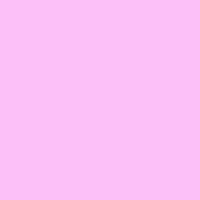

(161,46,231,125)


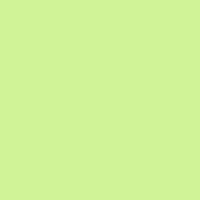

(109,248,78,218)


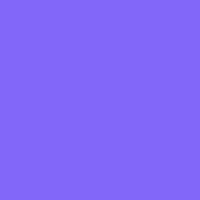

(15,96,197,119)


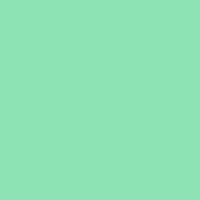

(240,124,123,30)


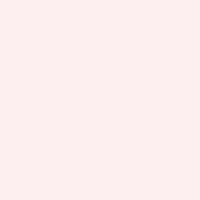

In [19]:
for i in range(5):
    [R,G,B,A]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    img = Image.new('RGBA',(200,200),(R,G,B,A))
    print(f'({R},{B},{G},{A})')
    display(img)

## Function to generate 3D vertices randomly within the boundary

In [20]:
L=100
B=200
H=400

In [23]:
numOfVertices=random.randint(10,1000)
numOfVertices

197

In [56]:
VERTICES=[]
i=0
while i<numOfVertices:
    x=random.randint(0,L)
    y=random.randint(0,H)
    z=random.randint(0,B)
    if [x,y,z] not in VERTICES:
        VERTICES.append([x,y,z])
        i+=1

In [57]:
len(VERTICES)

197

In [59]:
VERTICES

[[33, 363, 45],
 [85, 129, 73],
 [5, 368, 89],
 [49, 297, 4],
 [33, 135, 79],
 [28, 306, 13],
 [70, 182, 77],
 [50, 237, 163],
 [98, 183, 106],
 [80, 333, 39],
 [8, 362, 73],
 [63, 14, 25],
 [50, 212, 116],
 [66, 112, 69],
 [69, 211, 16],
 [78, 379, 63],
 [53, 28, 177],
 [63, 172, 133],
 [43, 138, 141],
 [20, 206, 45],
 [16, 172, 164],
 [83, 222, 49],
 [26, 98, 3],
 [56, 115, 45],
 [37, 68, 166],
 [36, 240, 106],
 [12, 64, 107],
 [81, 262, 19],
 [64, 370, 70],
 [14, 291, 106],
 [76, 271, 43],
 [67, 200, 199],
 [22, 320, 37],
 [43, 36, 120],
 [80, 45, 71],
 [35, 280, 115],
 [66, 244, 35],
 [5, 259, 90],
 [30, 105, 197],
 [65, 375, 42],
 [62, 236, 119],
 [57, 147, 154],
 [10, 117, 79],
 [55, 286, 104],
 [82, 55, 96],
 [67, 184, 98],
 [68, 307, 39],
 [79, 389, 195],
 [18, 12, 120],
 [98, 334, 171],
 [19, 280, 1],
 [2, 80, 124],
 [67, 267, 89],
 [58, 242, 170],
 [83, 120, 58],
 [73, 344, 14],
 [88, 161, 8],
 [28, 59, 161],
 [76, 231, 175],
 [70, 282, 148],
 [11, 100, 119],
 [99, 150, 71],


## Function to create FACES 

In [60]:
FACES={}

In [61]:
maxNoOfVerticesInAFace=random.randint(3,len(VERTICES))
maxNoOfVerticesInAFace

88

In [66]:
def fact(n):
    if n<=1:
        return 1
    return n*fact(n-1)

In [67]:
def nPr(n,r):
    return math.floor(fact(n) / fact(n - r))

In [197]:
def nCr(n, r):
     return math.floor(fact(n) / (fact(r) * fact(n - r)))

In [206]:
maxNoPossibleFaces3=nCr(197,3)
maxNoPossibleFaces3

1254890

In [207]:
nPr(197,197)

OverflowError: integer division result too large for a float

In [208]:
nCr(197,197)

1

In [217]:
maxNoPossibleFaces=0
for i in range(3,len(VERTICES)+1):
    maxNoPossibleFaces+=nCr(len(VERTICES),i)

maxNoPossibleFaces

200867255532373783796016679299017635000236213554926791976080

In [221]:
maxNoOfFaces=random.randint(3,maxNoPossibleFaces)
maxNoOfFaces

164712466758116206660451306218729948210892173147840293633722